# Dataset: [Crime In Baltimore](https://www.kaggle.com/datasets/sohier/crime-in-baltimore)

## About Dataset
This dataset provides information about the crimes commited in Baltimore city. This dataset is accessible from the link provided above. The dataset covers crimes commited in the city between the years 2016-2020.

This project consists of 7 parts:
1. Introduction
2. Data Cleaning
3. Data visualization
4. Data Preprocessing
5. Modeling
6. Inference
7. Conclusion

# 1. Introduction

This data consists of total 15 columns and 2,76,529 observations.

## Attribute description:
* **CrimeDate:** Date of committed crime
* **CrimeTime:** Time of Committed crime
* **CrimeCode:** A unique code assigned to crime based of crime type and weapon used
* **Location:** Location of commited crime
* **Inside/Outside:** Flag shows whether crime was commited inside the house or not
* **Weapon:** Description of weapon used in crime
* **Post:** Code of nearby police station
* **District:** District of location of committed crime
* **Neighbourhood:** Neighborhood of place of incident
* **Longitude:** longitude of location of committed crime
* **Latitude:** latitude of location of committed crime
* **Location 1:** tuple of consisting longitude and latitude
* **Premise:** Premise
* **Total incidents:** No. of incident in a crime


## **Let's look at the dataset**

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/Data Mining/Project/Assignment - 01/BPD_Part_1_Victim_Based_Crime_Data.csv")
df.head(10)

CrimeDate CrimeTime CrimeCode            Location          Description  \
0  09/02/2017  23:30:00       3JK     4200 AUDREY AVE  ROBBERY - RESIDENCE   
1  09/02/2017  23:00:00        7A   800 NEWINGTON AVE           AUTO THEFT   
2  09/02/2017  22:53:00        9S       600 RADNOR AV             SHOOTING   
3  09/02/2017  22:50:00        4C      1800 RAMSAY ST         AGG. ASSAULT   
4  09/02/2017  22:31:00        4E        100 LIGHT ST       COMMON ASSAULT   
5  09/02/2017  22:00:00        5A      CHERRYCREST RD             BURGLARY   
6  09/02/2017  21:15:00        1F     3400 HARMONY CT             HOMICIDE   
7  09/02/2017  21:35:00        3B    400 W LANVALE ST     ROBBERY - STREET   
8  09/02/2017  21:00:00        4C  2300 LYNDHURST AVE         AGG. ASSAULT   
9  09/02/2017  21:00:00        4E  1200 N ELLWOOD AVE       COMMON ASSAULT   

  Inside/Outside   Weapon   Post      District      Neighborhood  Longitude  \
0              I    KNIFE  913.0      SOUTHERN          Brooklyn  -76.60541   
1              O      NaN  133.0       CENTRAL    Reservoir Hill  -76.63217   
2        Outside  FIREARM  524.0      NORTHERN    Winston-Govans  -76.60697   
3              I    OTHER  934.0      SOUTHERN  Carrollton Ridge  -76.64526   
4              O    HANDS  113.0       CENTRAL     Downtown West  -76.61365   
5              I      NaN  922.0      SOUTHERN       Cherry Hill  -76.62131   
6        Outside  FIREARM  232.0  SOUTHEASTERN            Canton  -76.56827   
7              O      NaN  123.0       CENTRAL             Upton  -76.62789   
8              O    OTHER  641.0  NORTHWESTERN     Windsor Hills  -76.68365   
9              I    HANDS  332.0       EASTERN             Berea  -76.57419   

   Latitude                       Location 1     Premise  Total Incidents  
0  39.22951  (39.2295100000, -76.6054100000)  ROW/TOWNHO                1  
1  39.31360  (39.3136000000, -76.6321700000)      STREET                1  
2  39.34768  (39.3476800000, -76.6069700000)      Street                1  
3  39.28315  (39.2831500000, -76.6452600000)  ROW/TOWNHO                1  
4  39.28756  (39.2875600000, -76.6136500000)      STREET                1  
5  39.24867  (39.2486700000, -76.6213100000)  ROW/TOWNHO                1  
6  39.28202  (39.2820200000, -76.5682700000)      Street                1  
7  39.30254  (39.3025400000, -76.6278900000)      STREET                1  
8  39.31370  (39.3137000000, -76.6836500000)      STREET                1  
9  39.30551  (39.3055100000, -76.5741900000)  ROW/TOWNHO                1

In [ ]:
df.shape

(276529, 15)

In [ ]:
columns = df.columns.tolist()
columns

['CrimeDate',
 'CrimeTime',
 'CrimeCode',
 'Location',
 'Description',
 'Inside/Outside',
 'Weapon',
 'Post',
 'District',
 'Neighborhood',
 'Longitude',
 'Latitude',
 'Location 1',
 'Premise',
 'Total Incidents']

In [ ]:
df.isna().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      10279
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
dtype: int64

# 2. Data Cleaning

As it is visible that, there are 1,80,952 cells are null in the weapons column. Which is around 65% rows of the whole data.
Dropping this rows can lead to loss of much significant data, which can reduce the quality of the dataset.

To deal with this null values, we can look at some other attributes, which can be related to this attribute. Like, Crime type can help to determine which type of weapon is used in a perticular crime.

In [ ]:
# Find the list of crime types in which there are null entries in the weapon column
crime_with_no_weapon = set()
for idx in df.index:
    if pd.isna(df['Weapon'][idx]):
        crime_with_no_weapon.add(df['Description'][idx])
crime_with_no_weapon

{'ARSON',
 'ASSAULT BY THREAT',
 'AUTO THEFT',
 'BURGLARY',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET'}

## Crime type details:

* **Arson:** the criminal act of deliberately setting fire to property.
* **Assault by threat:** a threat or attempt to inflict offensive physical contact or bodily harm on a person that puts the person in immediate danger of or in apprehension
* **Auto theft:** the criminal act of stealing or attempting to steal a motor vehicle
* **Burglary:** llegal entry of a building with intent to commit a crime, especially theft.
* **Larceny:** theft of personal property
* **Rape:** to force someone to have sex when they are unwilling, using violence or threatening behaviour
* **Robbery:** the action of taking property unlawfully from a person or place by force or threat of force

As it visible that where weapon values are not available, the associated crime types are mostly robbery, theft, arson, larceny, etc. In these types of crime most of the time there are not any weapon involved in crime.

So, the blank cells in weapon cells doesn't indicate that the data is missing, but we can conclude that there could no weapons involved in the crime at the first place.

So, we can fill all this blank cells with the "No weapon" value.

In [ ]:
# fill blank cells in weapon column with "No weapon" value
df['Weapon'].fillna("NO WEAPON", inplace = True)

In [ ]:
df['Total Incidents'].value_counts()

1    276529
Name: Total Incidents, dtype: int64

In the 'Total Incident' columns all the entries are filled with value 1. Which does not provide any value to the dataset. So, there is no loss in dataset quality in dropping this columns.

After this, the 'Location 1' columns contains the tuple of (Longitude, Latitude) as values. There are also separate columns for Longitude and Latitude as well. So, dropping the Location 1 column also does not affect the dataset quality.

In [ ]:
# dropping Total Incident and Location 1 columns
df.drop(['Total Incidents', 'Location 1'], axis=1, inplace=True)
df.head()

CrimeDate CrimeTime CrimeCode           Location          Description  \
0  09/02/2017  23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE   
1  09/02/2017  23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2  09/02/2017  22:53:00        9S      600 RADNOR AV             SHOOTING   
3  09/02/2017  22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
4  09/02/2017  22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   

  Inside/Outside     Weapon   Post  District      Neighborhood  Longitude  \
0              I      KNIFE  913.0  SOUTHERN          Brooklyn  -76.60541   
1              O  NO WEAPON  133.0   CENTRAL    Reservoir Hill  -76.63217   
2        Outside    FIREARM  524.0  NORTHERN    Winston-Govans  -76.60697   
3              I      OTHER  934.0  SOUTHERN  Carrollton Ridge  -76.64526   
4              O      HANDS  113.0   CENTRAL     Downtown West  -76.61365   

   Latitude     Premise  
0  39.22951  ROW/TOWNHO  
1  39.31360      STREET  
2  39.34768      Street  
3  39.28315  ROW/TOWNHO  
4  39.28756      STREET

In [ ]:

df['Inside/Outside'].value_counts()

I          131999
O          129782
Outside      3837
Inside        632
Name: Inside/Outside, dtype: int64

Here, 'I' indicates Inside and 'O' indicates outside. There are also few entries in which Outside is written insted of O, and Inside is written insted of I. So, we should change those values with O and I respectively to maintain data integrity.

In [ ]:
df.loc[df['Inside/Outside'] == "Outside", 'Inside/Outside'] = 'O'
df.loc[df['Inside/Outside'] == "Inside", 'Inside/Outside'] = 'I'
df['Inside/Outside'].value_counts()

O    133619
I    132631
Name: Inside/Outside, dtype: int64

In [ ]:
# After all this, if there are still some entries with null or none values drop them
df.dropna(inplace = True)

In [ ]:
df.isna().sum(), df.shape

(CrimeDate         0
 CrimeTime         0
 CrimeCode         0
 Location          0
 Description       0
 Inside/Outside    0
 Weapon            0
 Post              0
 District          0
 Neighborhood      0
 Longitude         0
 Latitude          0
 Premise           0
 dtype: int64,
 (263118, 13))

We would now save our cleaned data frame into cleaned.csv file

In [ ]:
df.to_csv("cleaned.csv")

# 3. Data Visualization

In [ ]:
cleaned_df = pd.read_csv("cleaned.csv")

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


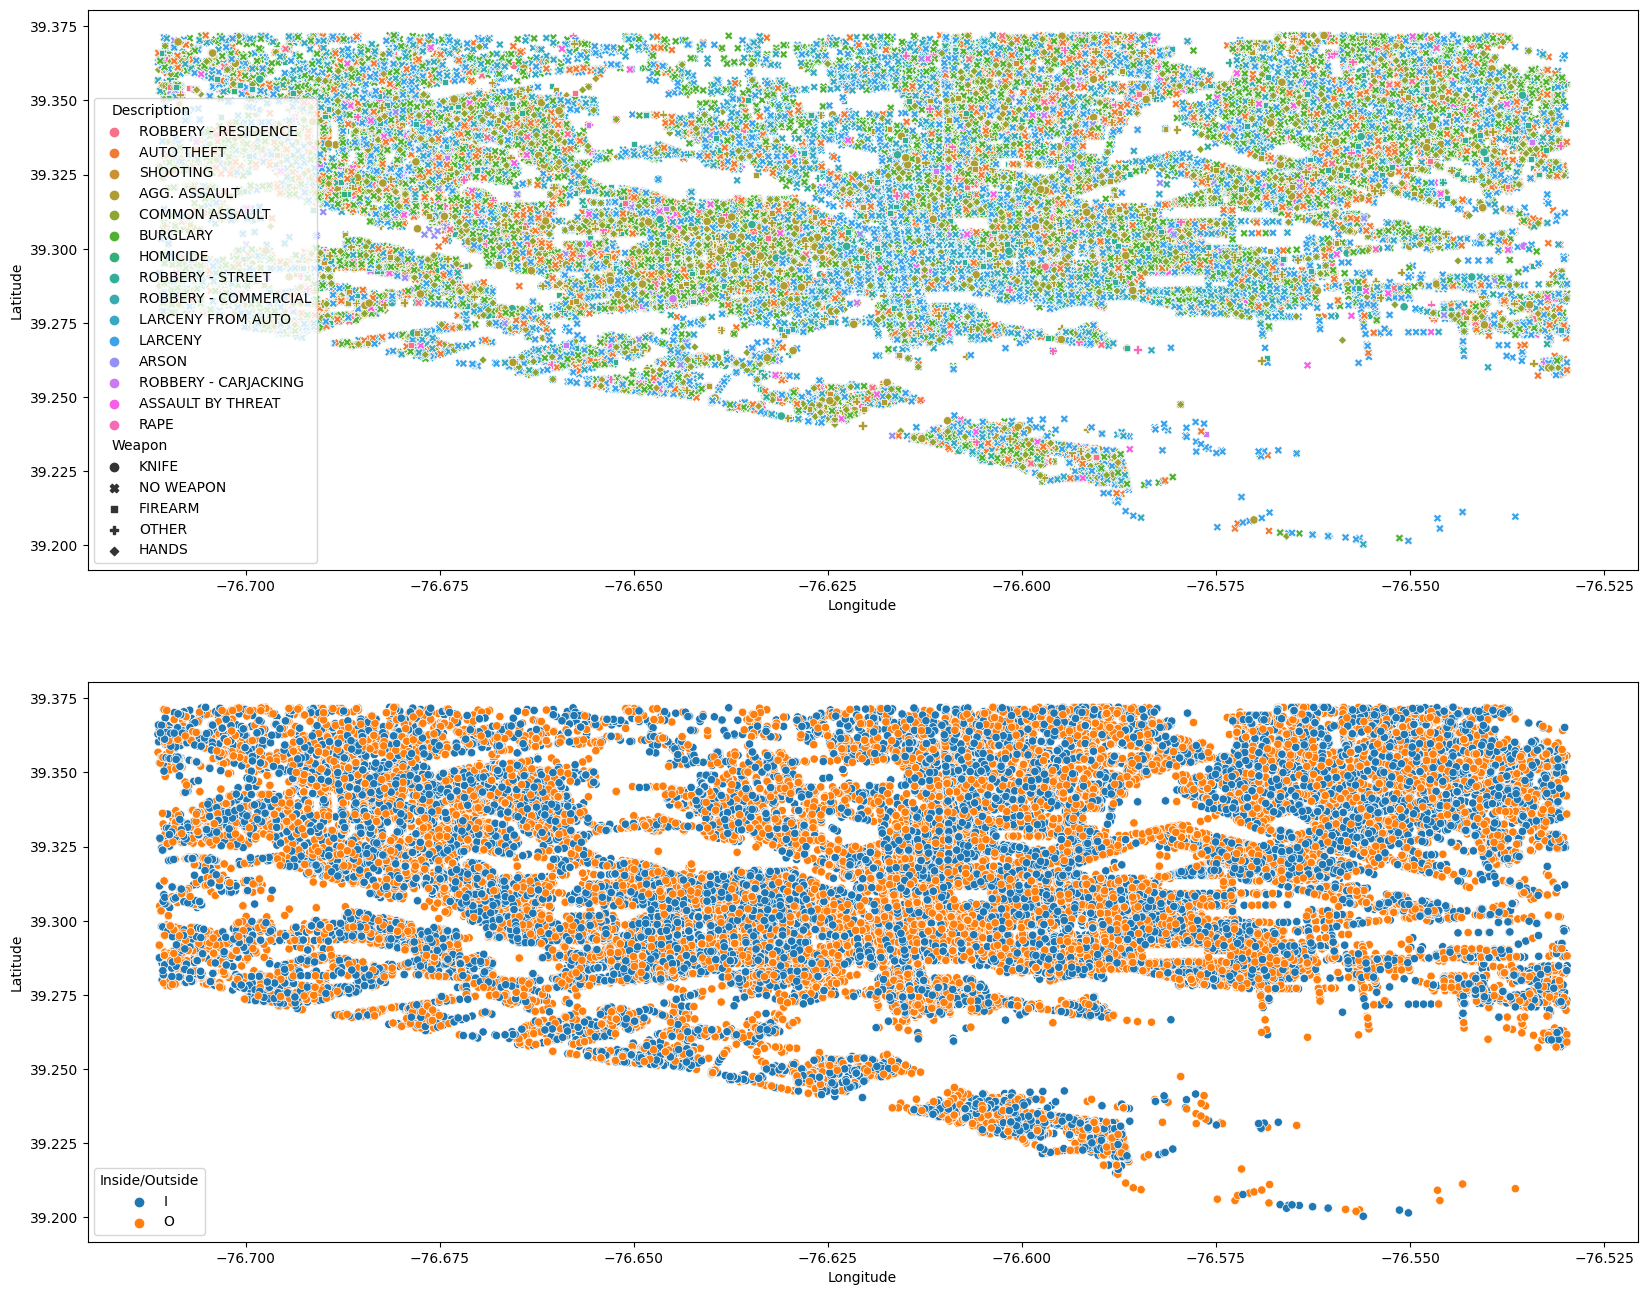

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,16))
sns.scatterplot(y=cleaned_df['Latitude'], x = cleaned_df['Longitude'], hue = cleaned_df['Description'], style=cleaned_df['Weapon'], ax = ax[0])
# sns.scatterplot(y=cleaned_df['Latitude'], x = cleaned_df['Longitude'], hue = cleaned_df['Weapon'], ax = ax[1])
sns.scatterplot(y=cleaned_df['Latitude'], x = cleaned_df['Longitude'], hue = cleaned_df['Inside/Outside'], ax = ax[1])
fig.show()

This plot shows the location of Crime description in Baltimore. We can infer what type of crime is prevalent in which area and what types of weapons are used.

We can see Larceny is more prevalent in central Baltimore while Robbery and Burglary is in Northern and Western Baltimore.

Crime location regarding Inside/Outside is uniformly distributed.

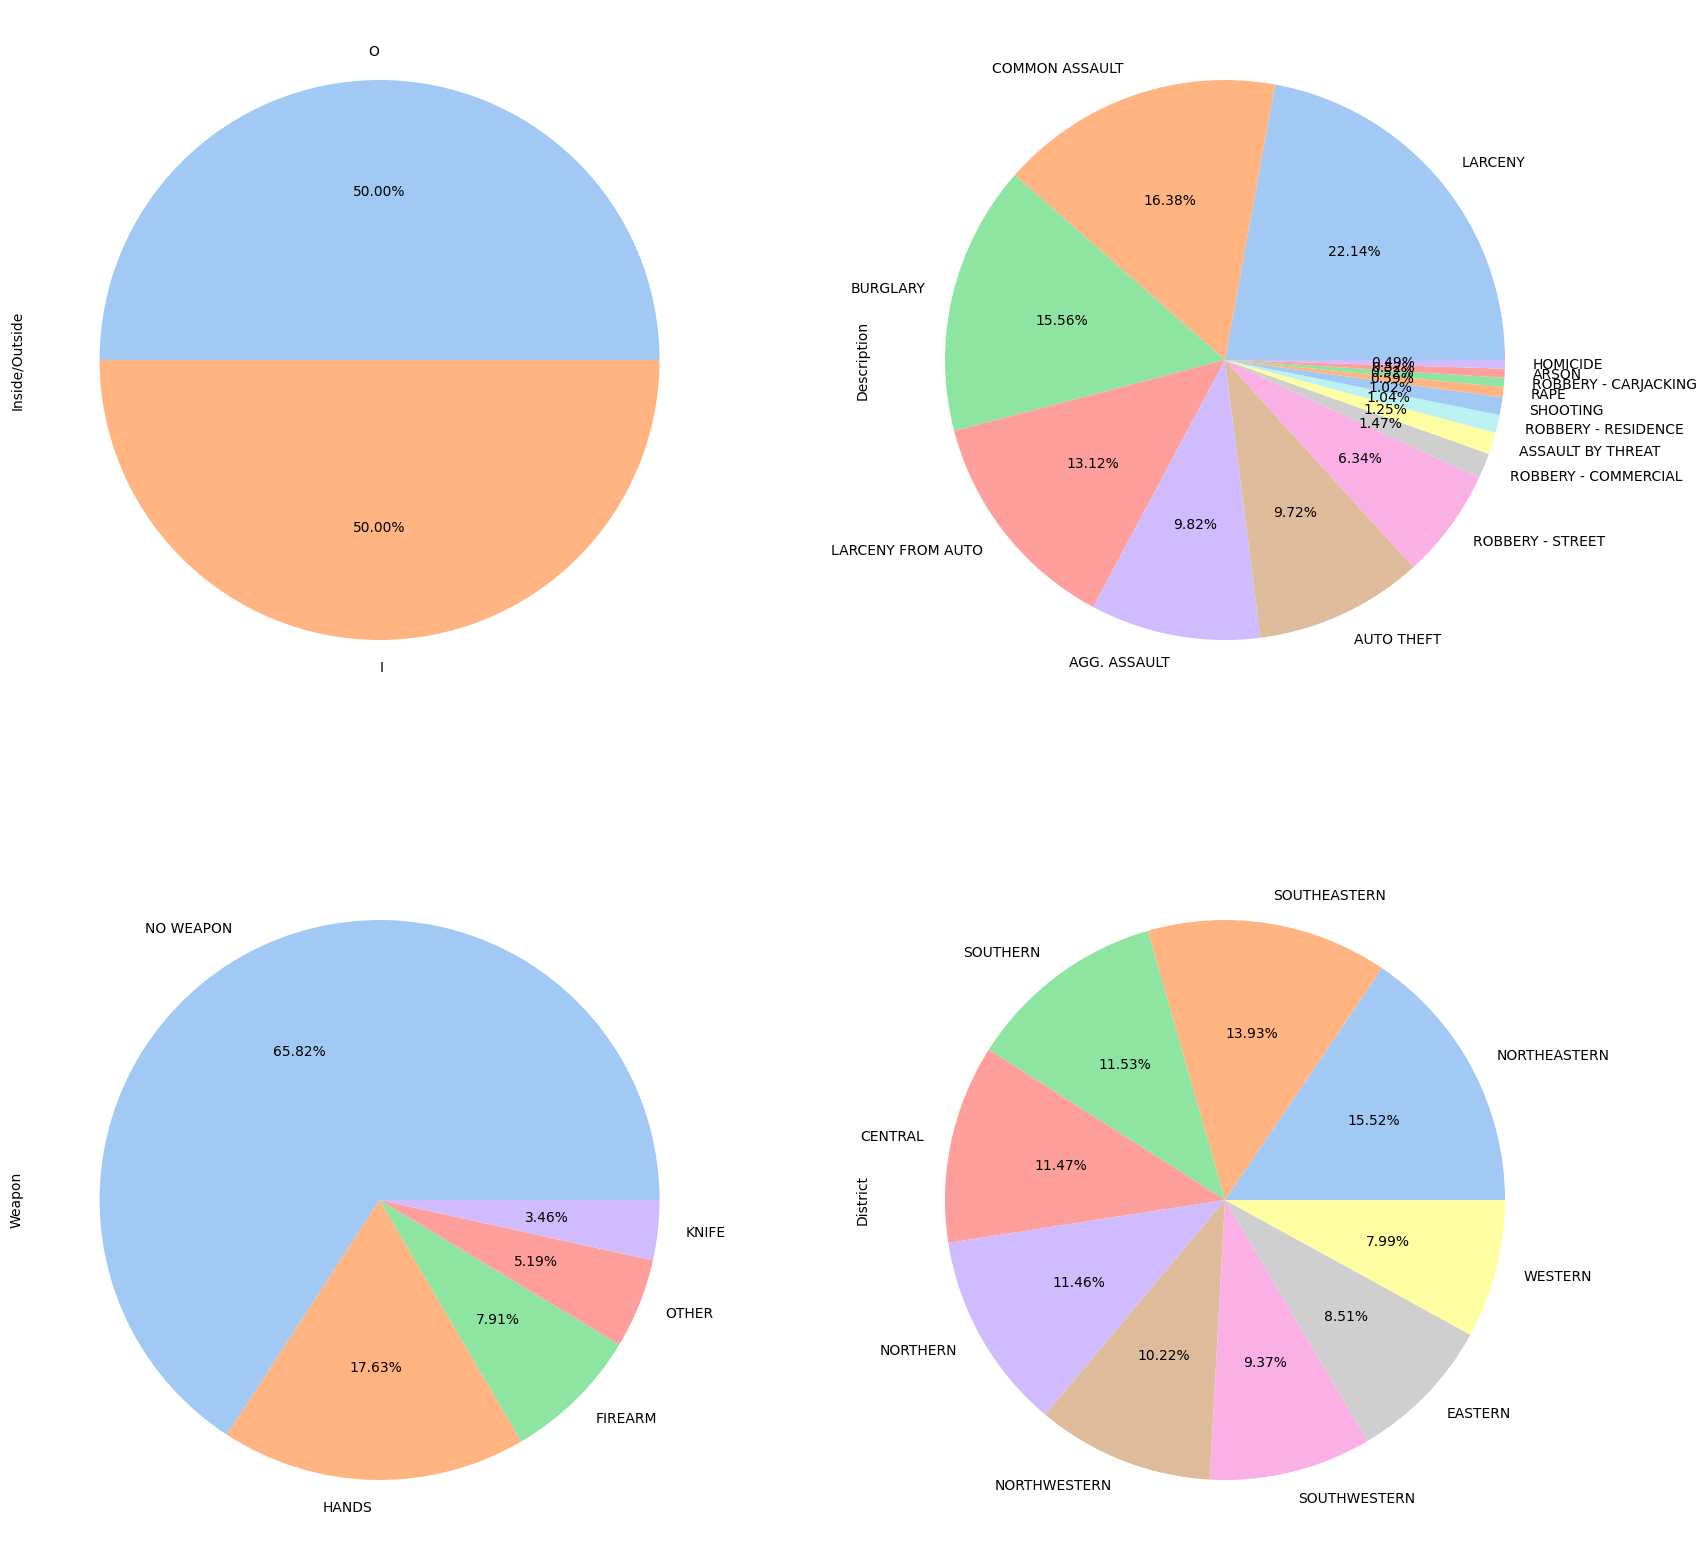

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.ravel()

crimeLoc = cleaned_df['Inside/Outside'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeLoc)]
crimeLoc.plot(kind = 'pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[0])

crimeDescription = cleaned_df.Description.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeDescription)]
crimeDescription.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax = ax[1])

weaponUsed = cleaned_df.Weapon.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(weaponUsed)]
weaponUsed.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[2])

district = cleaned_df.District.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(district)]
district.plot(kind='pie', colors=piec_colors, autopct ='%1.2f%%', ax=ax[3])
fig.show()

The first pie chart shows whether a crime was commited outside(on road) or inside (within house/ building). After data cleaning, the dataset has perfect division of crimes inside and outside.

The second pie chart describes the count of crimes using crime description. Major crimes are described as Larceny, Burglary and Assault.

The third pie chart describes the count of crimes using type of weapons used. In most of the crimes, either their is no weapon used or they are committed by hands.

The fourth pie chart describes the count of crimes using District Division. The crime rate is least in Western and Southern Baltimore.

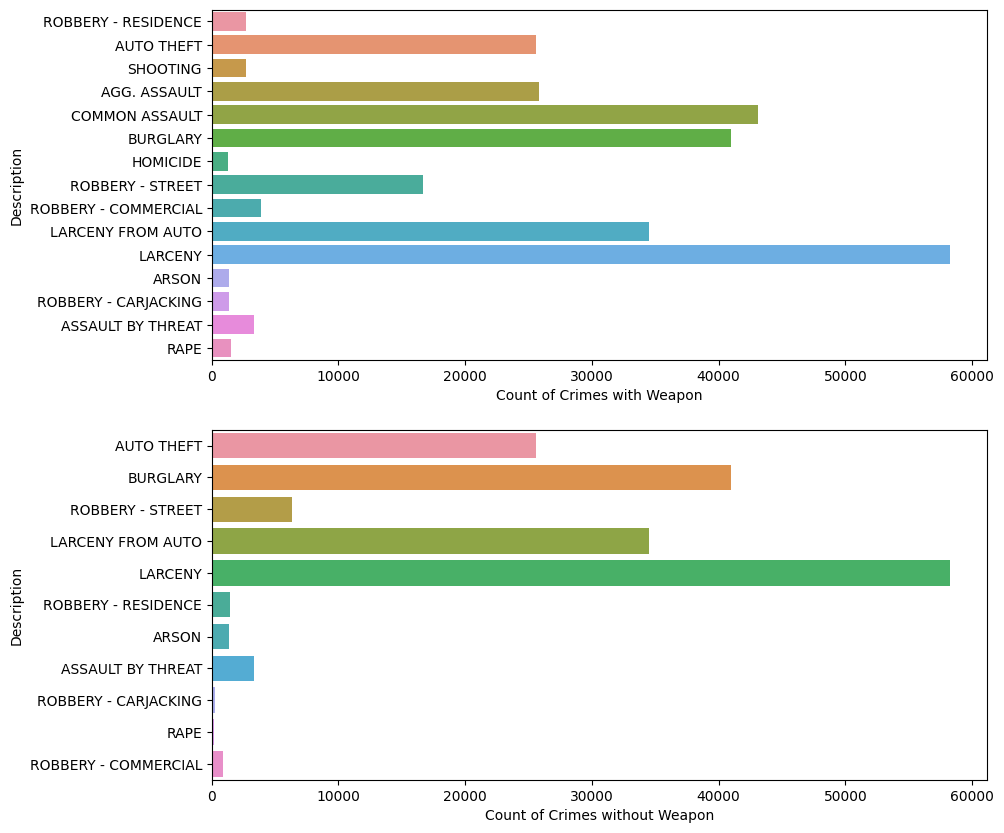

In [ ]:
#Show this to prove that null values = no weapons used. This has already been proved before in data cleaning, here is a visual representation.
fig, ax = plt.subplots(2,1)
sns.countplot(y = cleaned_df['Description'], ax = ax[0]).set_xlabel('Count of Crimes with Weapon')
dfNull = cleaned_df[cleaned_df['Weapon']=="NO WEAPON"]
sns.countplot(y= dfNull['Description'], ax = ax[1]).set_xlabel('Count of Crimes without Weapon')
fig.set_size_inches(10,10)
fig.show()

It is reasonable to assume that null values for weapons indicate that there was no use of a weapon when comparing the two categories of crimes committed with and without weapons. Let's substitute "NO WEAPON" for the nulls.

To find relations with CrimeTime, time needs to be striped into hours, mins and date into year, month, and weekday.

In [ ]:
cleaned_df['CrimeTime'] = cleaned_df['CrimeTime'].str.replace('24:00:00', '00:00:00')

In [ ]:
cleaned_df['Date'] = cleaned_df['CrimeDate'] + ' ' + cleaned_df['CrimeTime']
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date']) #Converting to pandas datetime so that it can be split easily.

In [ ]:
cleaned_df['Day'] = cleaned_df['Date'].dt.day
cleaned_df['Month'] = cleaned_df['Date'].dt.month
cleaned_df['Year'] = cleaned_df['Date'].dt.year
cleaned_df['Weekday'] = cleaned_df['Date'].dt.weekday + 1 #To convert to 1-based indexing
cleaned_df['Hour'] = cleaned_df['Date'].dt.hour

In [ ]:
cleaned_df.drop(['CrimeDate', 'CrimeTime'], axis = 1, inplace=True)

In [ ]:
cleaned_df.set_index('Date', inplace=True)

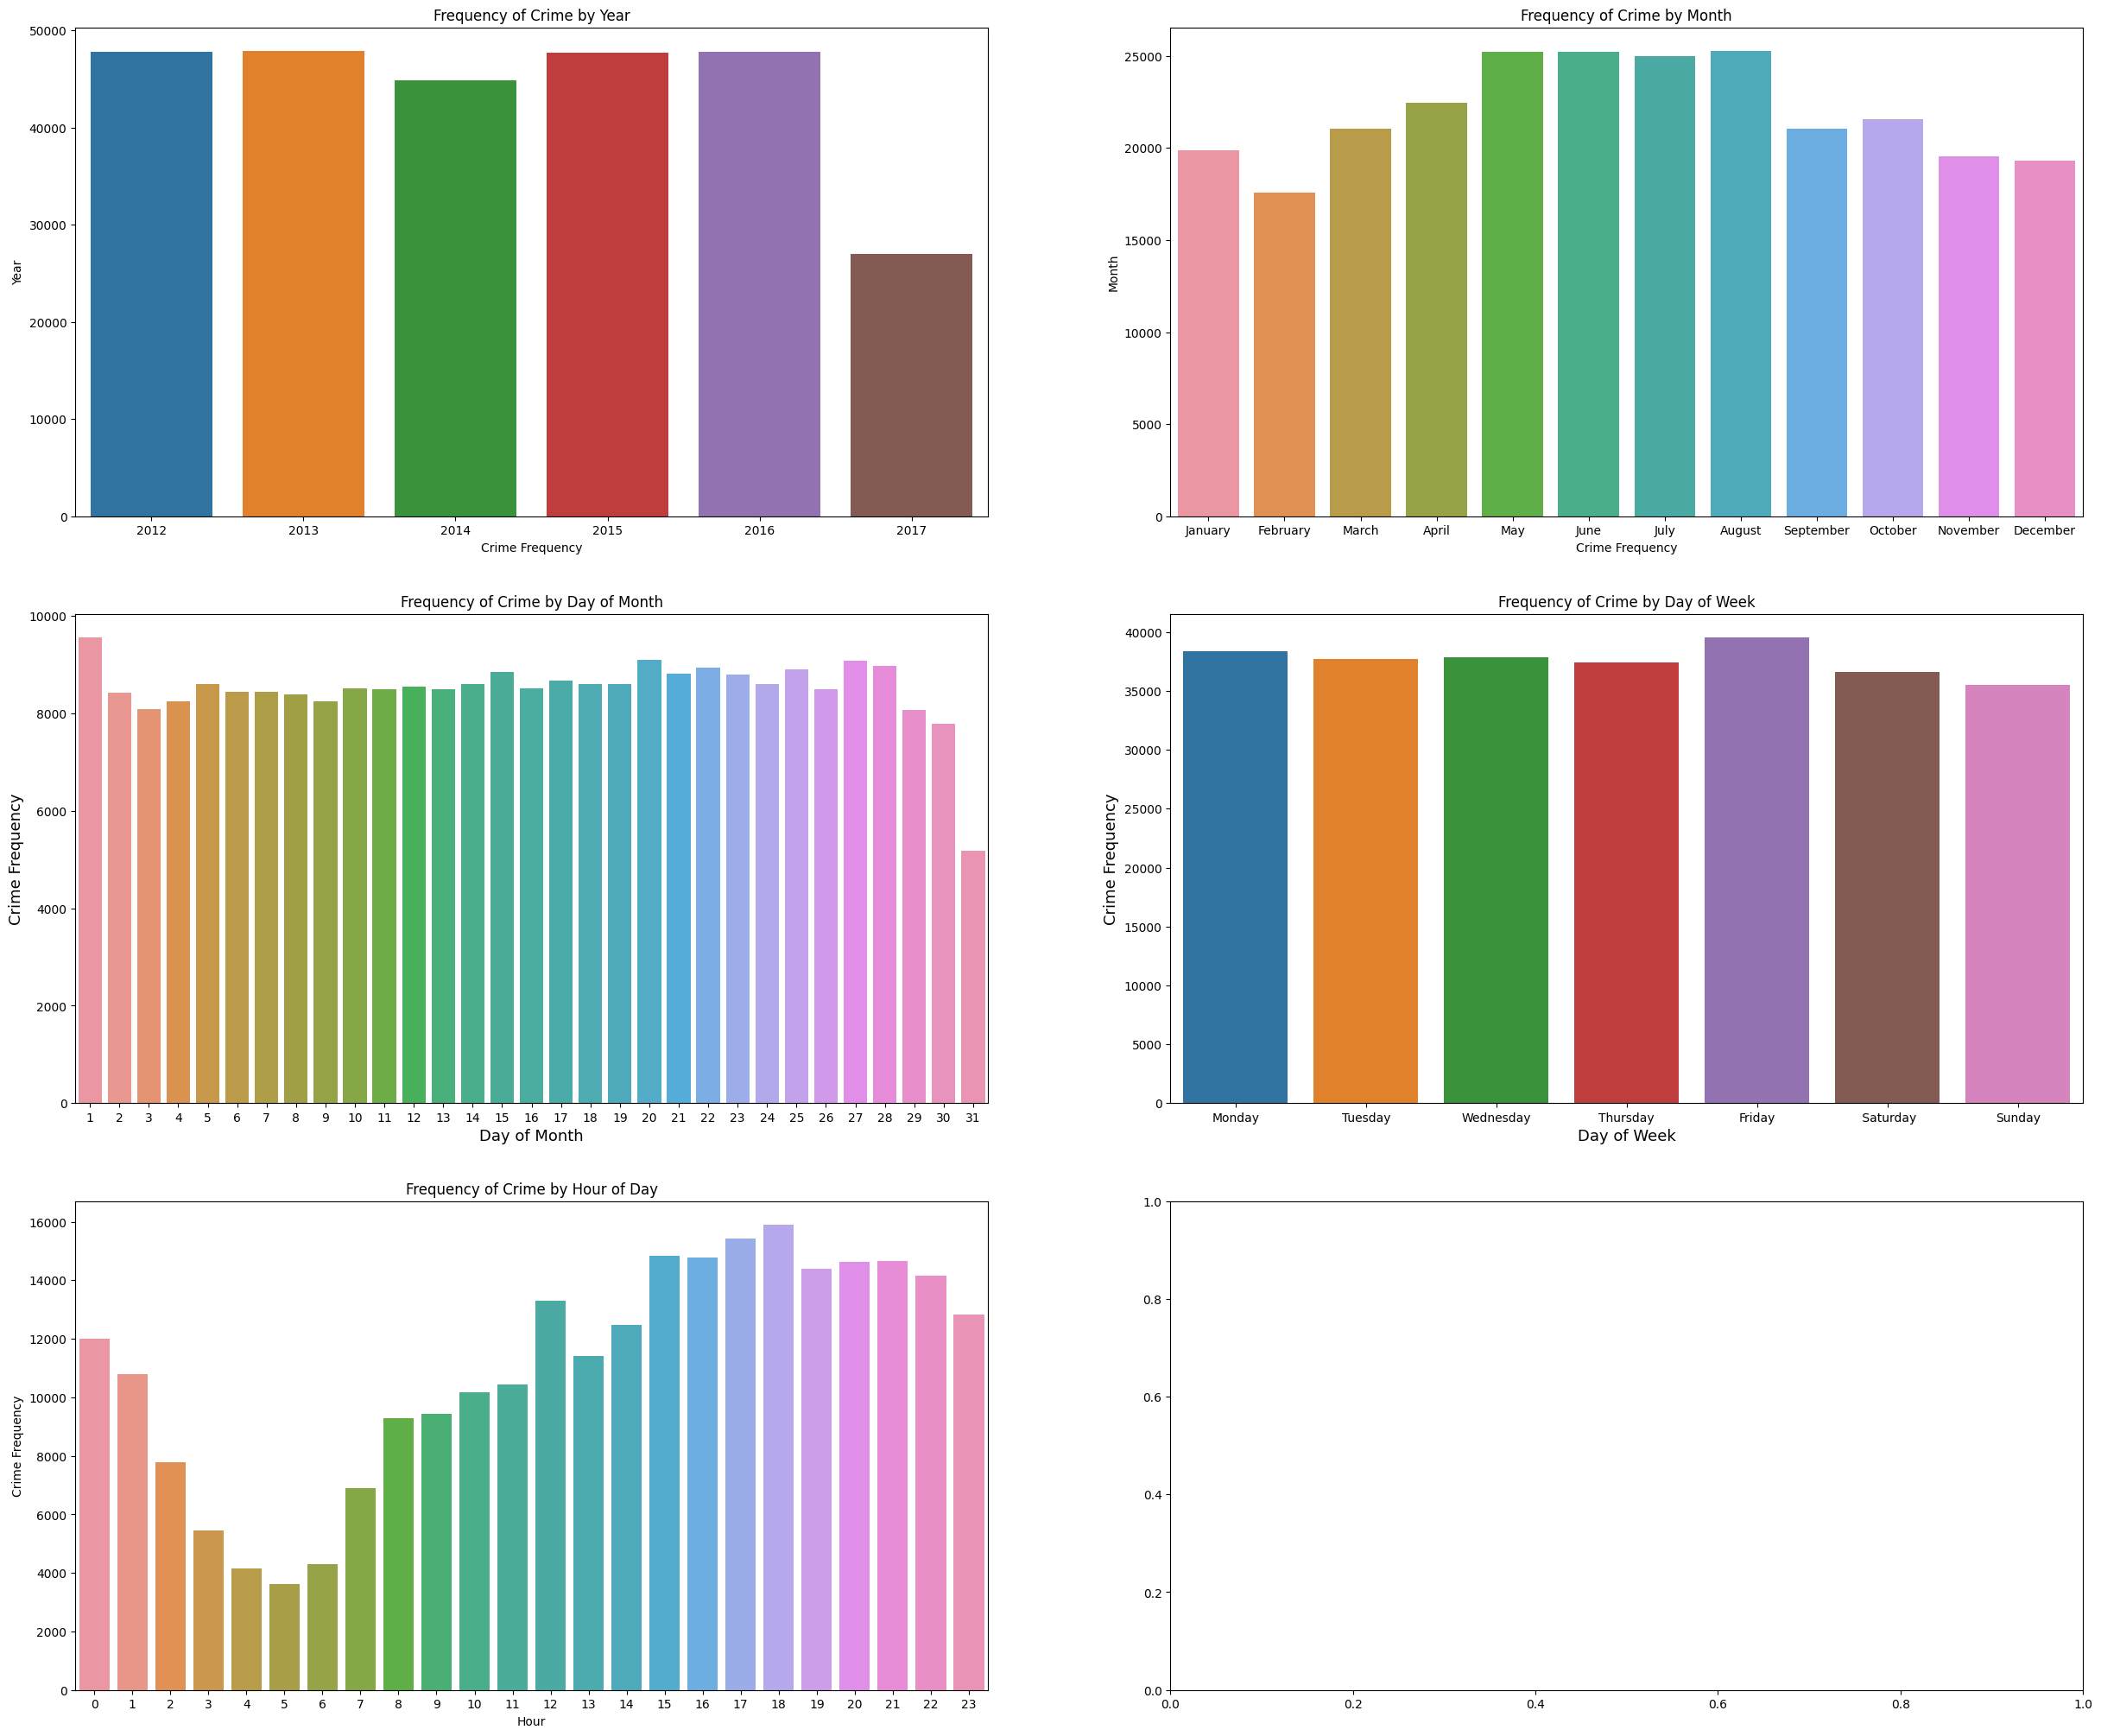

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(30,25))
ax = ax.ravel()

ax[0].set_title('Frequency of Crime by Year')
fig1 = sns.countplot(x = 'Year', data = cleaned_df, ax=ax[0])
fig1.set_xlabel('Crime Frequency')
fig1.set_ylabel('Year')


ax[1].set_title('Frequency of Crime by Month')
fig2 = sns.countplot(x = 'Month', data = cleaned_df, ax=ax[1])
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig2.set_xticklabels(labels)
fig2.set_xlabel('Crime Frequency')
fig2.set_ylabel('Month')

ax[2].set_title('Frequency of Crime by Day of Month')
fig3 = sns.countplot(x = 'Day', data = cleaned_df, ax=ax[2])
fig3.set_ylabel("Crime Frequency", fontsize=13)
fig3.set_xlabel('Day of Month', fontsize=13)

ax[3].set_title('Frequency of Crime by Day of Week')
fig3 = sns.countplot(x = 'Weekday', data = cleaned_df, ax=ax[3])
fig3.set_ylabel("Crime Frequency", fontsize=13)
fig3.set_xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
fig3.set_xticklabels(labels)

ax[4].set_title('Frequency of Crime by Hour of Day')
fig4 = sns.countplot(x = 'Hour', data = cleaned_df, ax=ax[4])
fig4.set_ylabel("Crime Frequency")
fig4.set_xlabel('Hour')

fig.show()

The first bar graph shows frequency of crime by year. The crime rate is almost constant for each year. The dip is the year 2017 is mostly due to incomplete data for the rest of the year.

The second bar graph shows frequency of crime by month. The crime rate is relatively high in the middle months of the year.

The third bar graph shows frequency of crime by day of month.The crime rate is same throughout every days of the month, we can see a relative dip at the end of the month.

The fourth bar graph shows frequency of crime by day of week. The crime rate is unifoem for every day of the week.  

The fifth bar graph shows frequency of crime by hour of day. Thr crime rate is low at midnight and early morning hours.

In [ ]:
Description_list = cleaned_df.Description.unique()

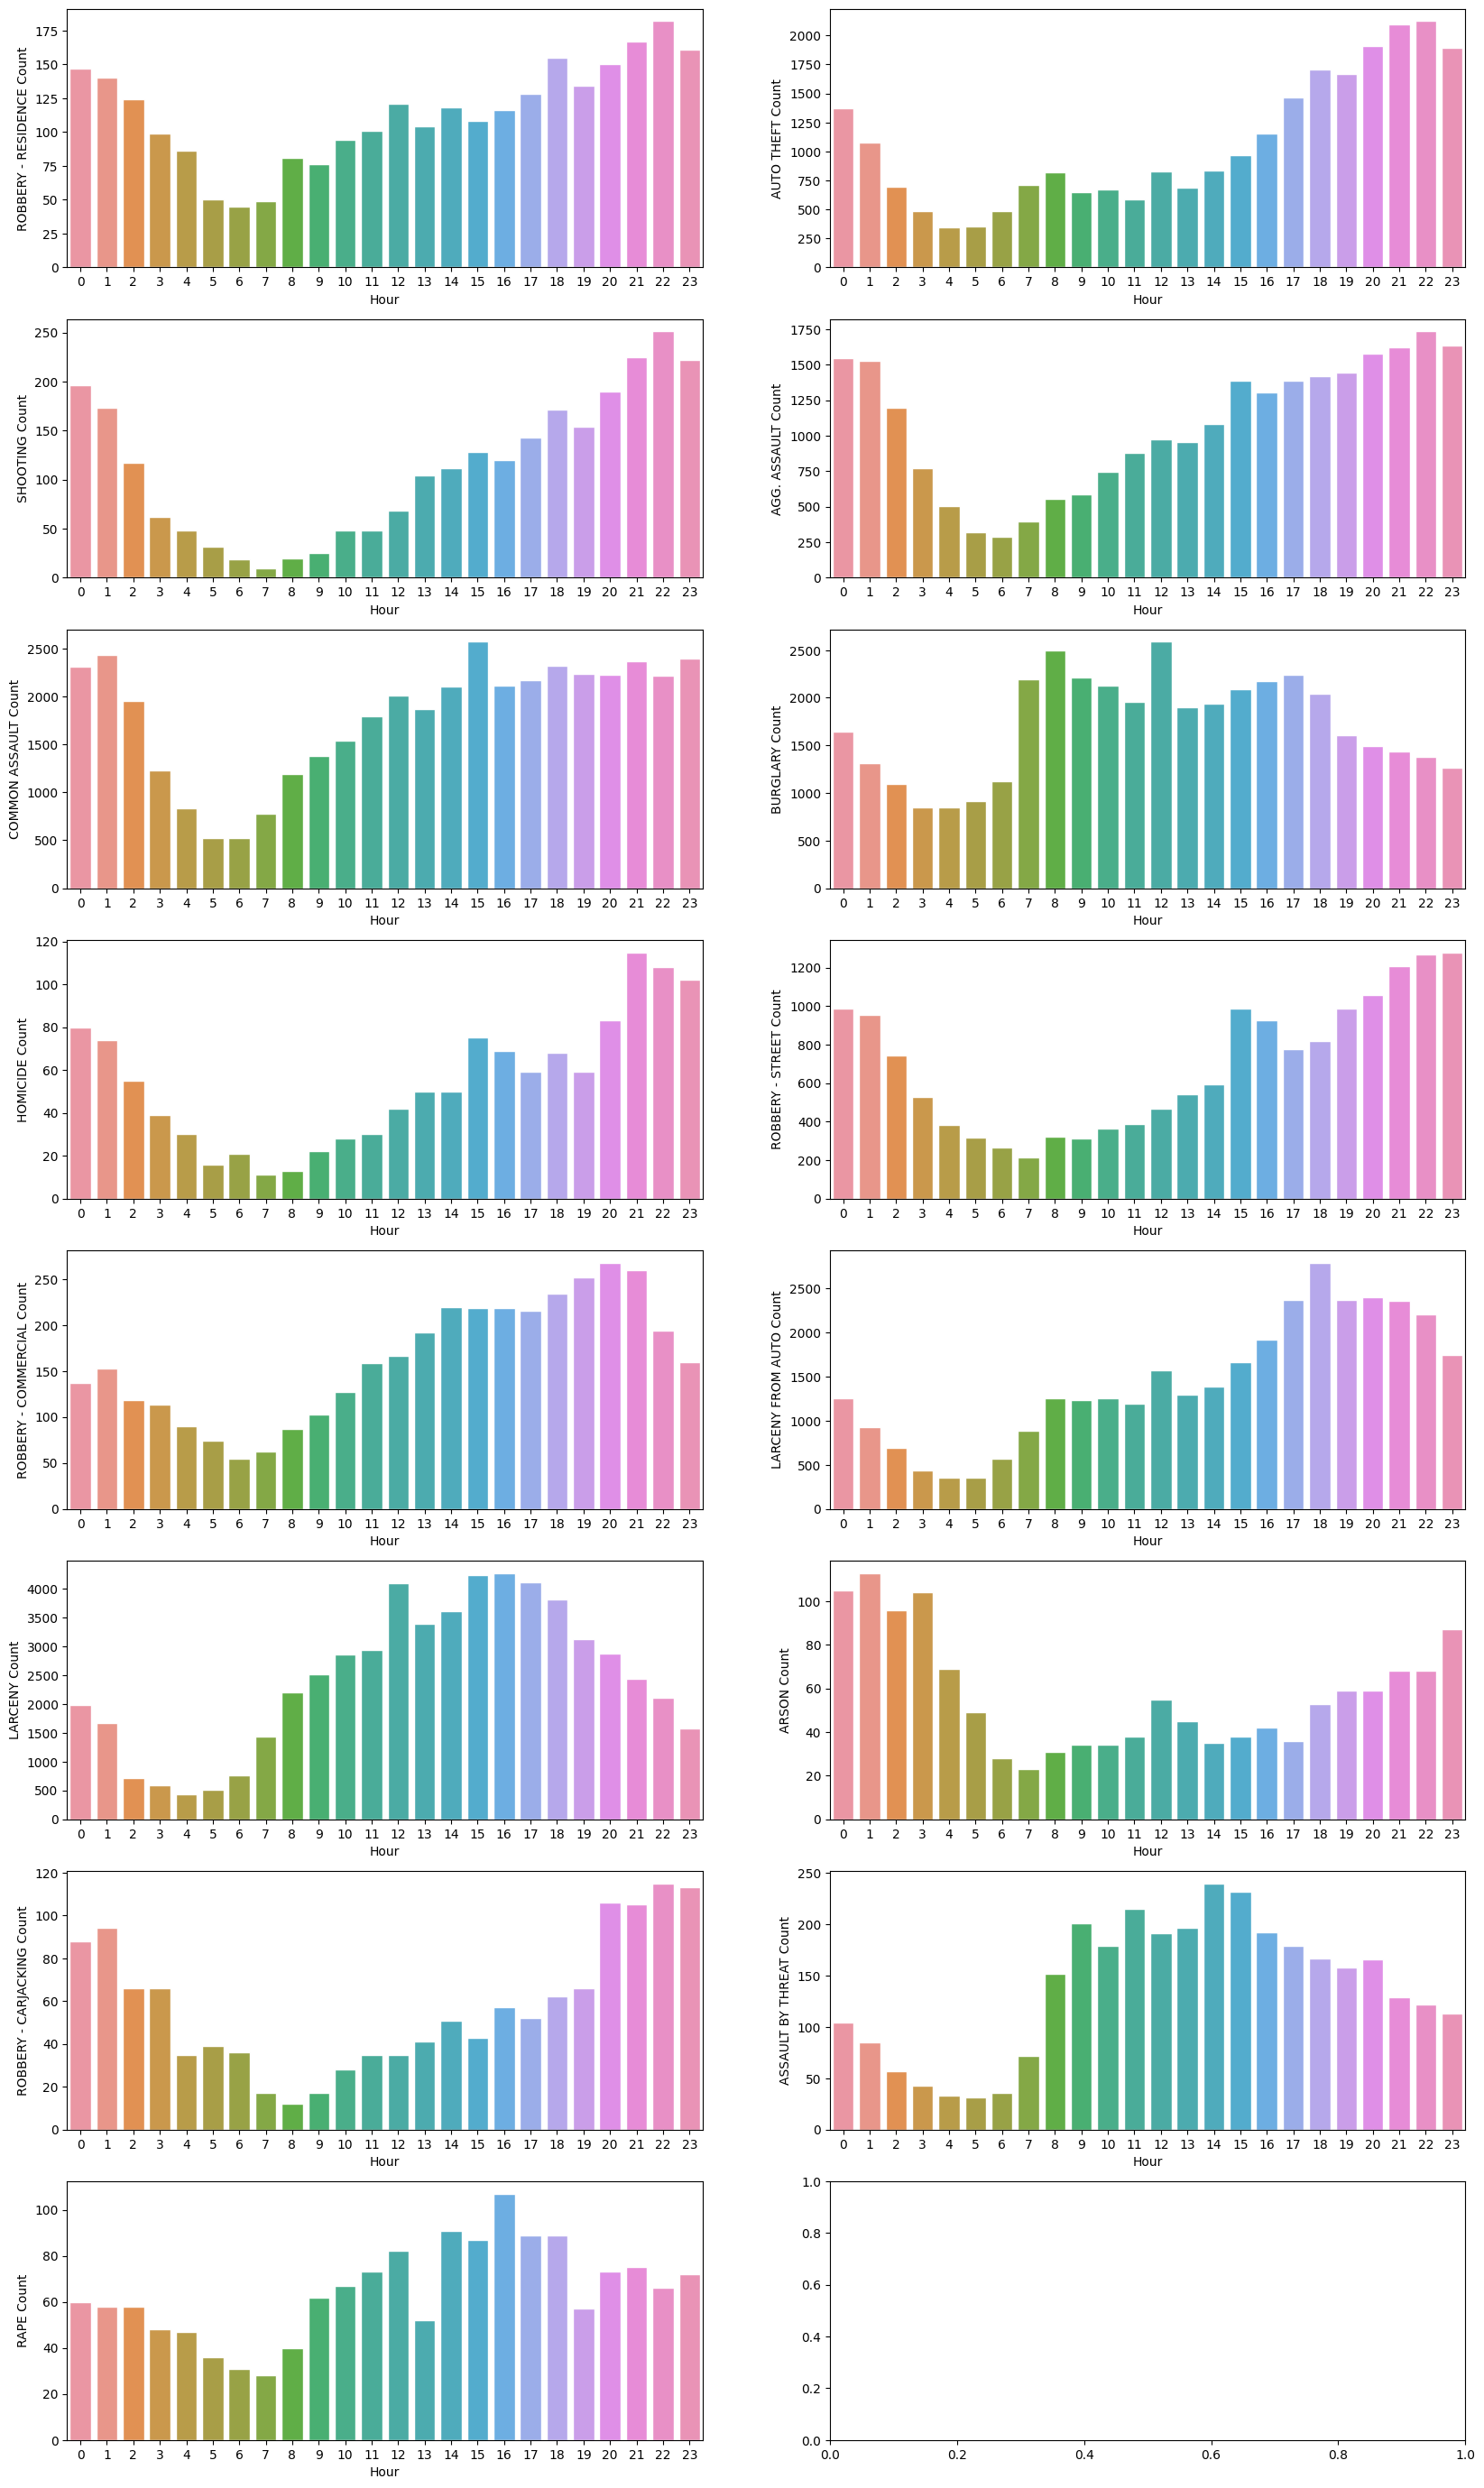

In [ ]:
fig,ax = plt.subplots(8,2, figsize=(20,35))

ax=ax.ravel()
sns.set_theme(style='whitegrid')
for axid,col in enumerate(Description_list):
    sns.countplot(x= 'Hour', data = cleaned_df[cleaned_df.Description==col] , ax=ax[axid]).set_ylabel(col + ' Count')

The graphs describe different crime description count by hour of day. Larceny, Robbery, Burglary, Assault and Rape related crimes are more during mid-day time, while rest crimes are more during mid-night time.

Folium Map

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
cleaned_df['Latitude'].median()

39.30368

In [ ]:
cleaned_df['Longitude'].median()

-76.61401

In [ ]:
def createMap(defaultLocation = [39.30368, -76.61401], defaultZoomStart = 12):
    defMap = folium.Map(location = defaultLocation, control_scale = True, tiles="Stamen Toner", zoom_start = defaultZoomStart)
    return defMap

In [ ]:
map = createMap()

In [ ]:
cleaned_df['count'] = 1

In [ ]:
df_murder = cleaned_df[cleaned_df['Description'] == 'HOMICIDE']

In [ ]:
HeatMap(
        data = df_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(map)
map

# 4. Pre-Processing

In this part we are going to do preprocessing on the cleaned data which we stored as form of cleaned.csv file

In [ ]:
# cleaned_df.columns
cleaned_df.drop(columns = ['Unnamed: 0'], inplace=True)

Adding 'Location 1' columns back into the dataset to make pre-processing easy and removing 'Latitude' and 'Longitude', which will be unnecessary.

In [ ]:
def combine(row):
    return str(tuple([row['Latitude']] + [row['Longitude']]))

In [ ]:
cleaned_df['Location 1'] = cleaned_df.apply(combine, axis=1)

Combining Day, month, year, weekday, hour to make CrimeTime column.

In [ ]:
# Bringing back original indexing, to retain Date column
cleaned_df.reset_index(inplace=True)

In [ ]:
cleaned_df[['CrimeDate', 'CrimeTime']] = cleaned_df['Date'].astype(str).str.split(' ', n=1, expand=True)

In [ ]:
cleaned_df.head()

Date CrimeCode           Location          Description  \
0 2017-09-02 23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE   
1 2017-09-02 23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2 2017-09-02 22:53:00        9S      600 RADNOR AV             SHOOTING   
3 2017-09-02 22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
4 2017-09-02 22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   

  Inside/Outside     Weapon   Post  District      Neighborhood  Longitude  \
0              I      KNIFE  913.0  SOUTHERN          Brooklyn  -76.60541   
1              O  NO WEAPON  133.0   CENTRAL    Reservoir Hill  -76.63217   
2              O    FIREARM  524.0  NORTHERN    Winston-Govans  -76.60697   
3              I      OTHER  934.0  SOUTHERN  Carrollton Ridge  -76.64526   
4              O      HANDS  113.0   CENTRAL     Downtown West  -76.61365   

   ...     Premise Day  Month  Year  Weekday  Hour  count  \
0  ...  ROW/TOWNHO   2      9  2017        6    23      1   
1  ...      STREET   2      9  2017        6    23      1   
2  ...      Street   2      9  2017        6    22      1   
3  ...  ROW/TOWNHO   2      9  2017        6    22      1   
4  ...      STREET   2      9  2017        6    22      1   

              Location 1   CrimeDate CrimeTime  
0  (39.22951, -76.60541)  2017-09-02  23:30:00  
1   (39.3136, -76.63217)  2017-09-02  23:00:00  
2  (39.34768, -76.60697)  2017-09-02  22:53:00  
3  (39.28315, -76.64526)  2017-09-02  22:50:00  
4  (39.28756, -76.61365)  2017-09-02  22:31:00  

[5 rows x 21 columns]

In [ ]:
cleaned_df.columns

Index(['Date', 'CrimeCode', 'Location', 'Description', 'Inside/Outside',
       'Weapon', 'Post', 'District', 'Neighborhood', 'Longitude', 'Latitude',
       'Premise', 'Day', 'Month', 'Year', 'Weekday', 'Hour', 'count',
       'Location 1', 'CrimeDate', 'CrimeTime'],
      dtype='object')

Dropping unnecessary columns like, 'Latitude', 'Longitude', 'Date', 'Day', 'Weekday', etc.

In [ ]:
cleaned_df.drop(['Latitude', 'Longitude', 'Date', 'Day', 'Month', 'Year', 'Weekday', 'Hour', 'count'], axis=1, inplace=True)

In [ ]:
cleaned_df.head(7)

CrimeCode           Location          Description Inside/Outside     Weapon  \
0       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE              I      KNIFE   
1        7A  800 NEWINGTON AVE           AUTO THEFT              O  NO WEAPON   
2        9S      600 RADNOR AV             SHOOTING              O    FIREARM   
3        4C     1800 RAMSAY ST         AGG. ASSAULT              I      OTHER   
4        4E       100 LIGHT ST       COMMON ASSAULT              O      HANDS   
5        5A     CHERRYCREST RD             BURGLARY              I  NO WEAPON   
6        1F    3400 HARMONY CT             HOMICIDE              O    FIREARM   

    Post      District      Neighborhood     Premise             Location 1  \
0  913.0      SOUTHERN          Brooklyn  ROW/TOWNHO  (39.22951, -76.60541)   
1  133.0       CENTRAL    Reservoir Hill      STREET   (39.3136, -76.63217)   
2  524.0      NORTHERN    Winston-Govans      Street  (39.34768, -76.60697)   
3  934.0      SOUTHERN  Carrollton Ridge  ROW/TOWNHO  (39.28315, -76.64526)   
4  113.0       CENTRAL     Downtown West      STREET  (39.28756, -76.61365)   
5  922.0      SOUTHERN       Cherry Hill  ROW/TOWNHO  (39.24867, -76.62131)   
6  232.0  SOUTHEASTERN            Canton      Street  (39.28202, -76.56827)   

    CrimeDate CrimeTime  
0  2017-09-02  23:30:00  
1  2017-09-02  23:00:00  
2  2017-09-02  22:53:00  
3  2017-09-02  22:50:00  
4  2017-09-02  22:31:00  
5  2017-09-02  22:00:00  
6  2017-09-02  21:15:00

In [ ]:
cleaned_df.columns

Index(['CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon',
       'Post', 'District', 'Neighborhood', 'Premise', 'Location 1',
       'CrimeDate', 'CrimeTime'],
      dtype='object')

In [ ]:
feature_list = ["CrimeDate" , "CrimeTime" , "CrimeCode" , "Location" , "Description" , "Inside/Outside" , "Weapon" , "Post" , "District" , "Neighborhood" , "Location 1" ,"Premise" ]
print(feature_list)

['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Location 1', 'Premise']


converting time stamp to minutes

In [ ]:
def convert(timestamp):
  hour = timestamp[0] + timestamp[1]
  minutes = timestamp[3] + timestamp[4]
  return int(hour)*60 + int(minutes)

applying lambda function to convert all the timestamp to correponding minutes

In [ ]:
cleaned_df[feature_list[1]] = cleaned_df[feature_list[1]].apply(lambda x : convert(x))
cleaned_df['CrimeTime']

0         1410
1         1380
2         1373
3         1370
4         1351
          ... 
263113       0
263114       0
263115       0
263116       0
263117       0
Name: CrimeTime, Length: 263118, dtype: int64

### Encoding the categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for ind , col in enumerate(feature_list):
  if(col not in ['CrimeTime']):
    le = LabelEncoder()
    label = le.fit_transform(cleaned_df[col])
    cleaned_df[col] = label + 1

In [ ]:
df.head(7)

CrimeDate CrimeTime CrimeCode           Location          Description  \
0  09/02/2017  23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE   
1  09/02/2017  23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2  09/02/2017  22:53:00        9S      600 RADNOR AV             SHOOTING   
3  09/02/2017  22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
4  09/02/2017  22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   
5  09/02/2017  22:00:00        5A     CHERRYCREST RD             BURGLARY   
6  09/02/2017  21:15:00        1F    3400 HARMONY CT             HOMICIDE   

  Inside/Outside     Weapon   Post      District      Neighborhood  Longitude  \
0              I      KNIFE  913.0      SOUTHERN          Brooklyn  -76.60541   
1              O  NO WEAPON  133.0       CENTRAL    Reservoir Hill  -76.63217   
2              O    FIREARM  524.0      NORTHERN    Winston-Govans  -76.60697   
3              I      OTHER  934.0      SOUTHERN  Carrollton Ridge  -76.64526   
4              O      HANDS  113.0       CENTRAL     Downtown West  -76.61365   
5              I  NO WEAPON  922.0      SOUTHERN       Cherry Hill  -76.62131   
6              O    FIREARM  232.0  SOUTHEASTERN            Canton  -76.56827   

   Latitude     Premise  
0  39.22951  ROW/TOWNHO  
1  39.31360      STREET  
2  39.34768      Street  
3  39.28315  ROW/TOWNHO  
4  39.28756      STREET  
5  39.24867  ROW/TOWNHO  
6  39.28202      Street

## Feature Selection

*   we will plot a heatmap of out dataframe to see the correlation between different feature.
*   We can drop those feature with high correlation to avoid the data redundancy.

<Axes: >

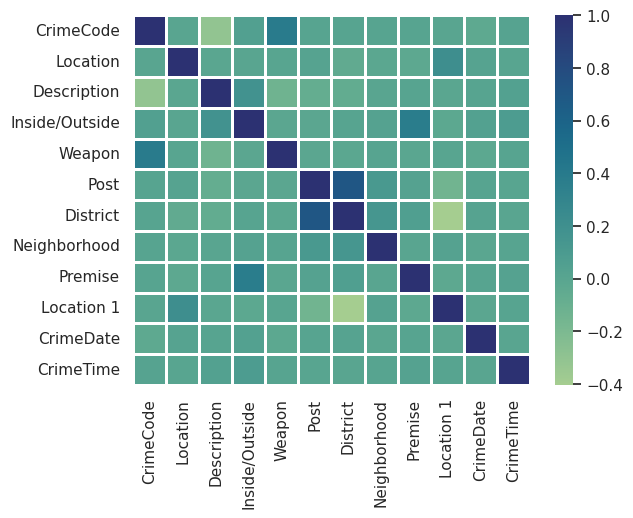

In [ ]:
sns.heatmap(cleaned_df.corr() , lw = 1 , cmap="crest")

It seems like there is no strong correlation between the attributes.

## Outliers Detection

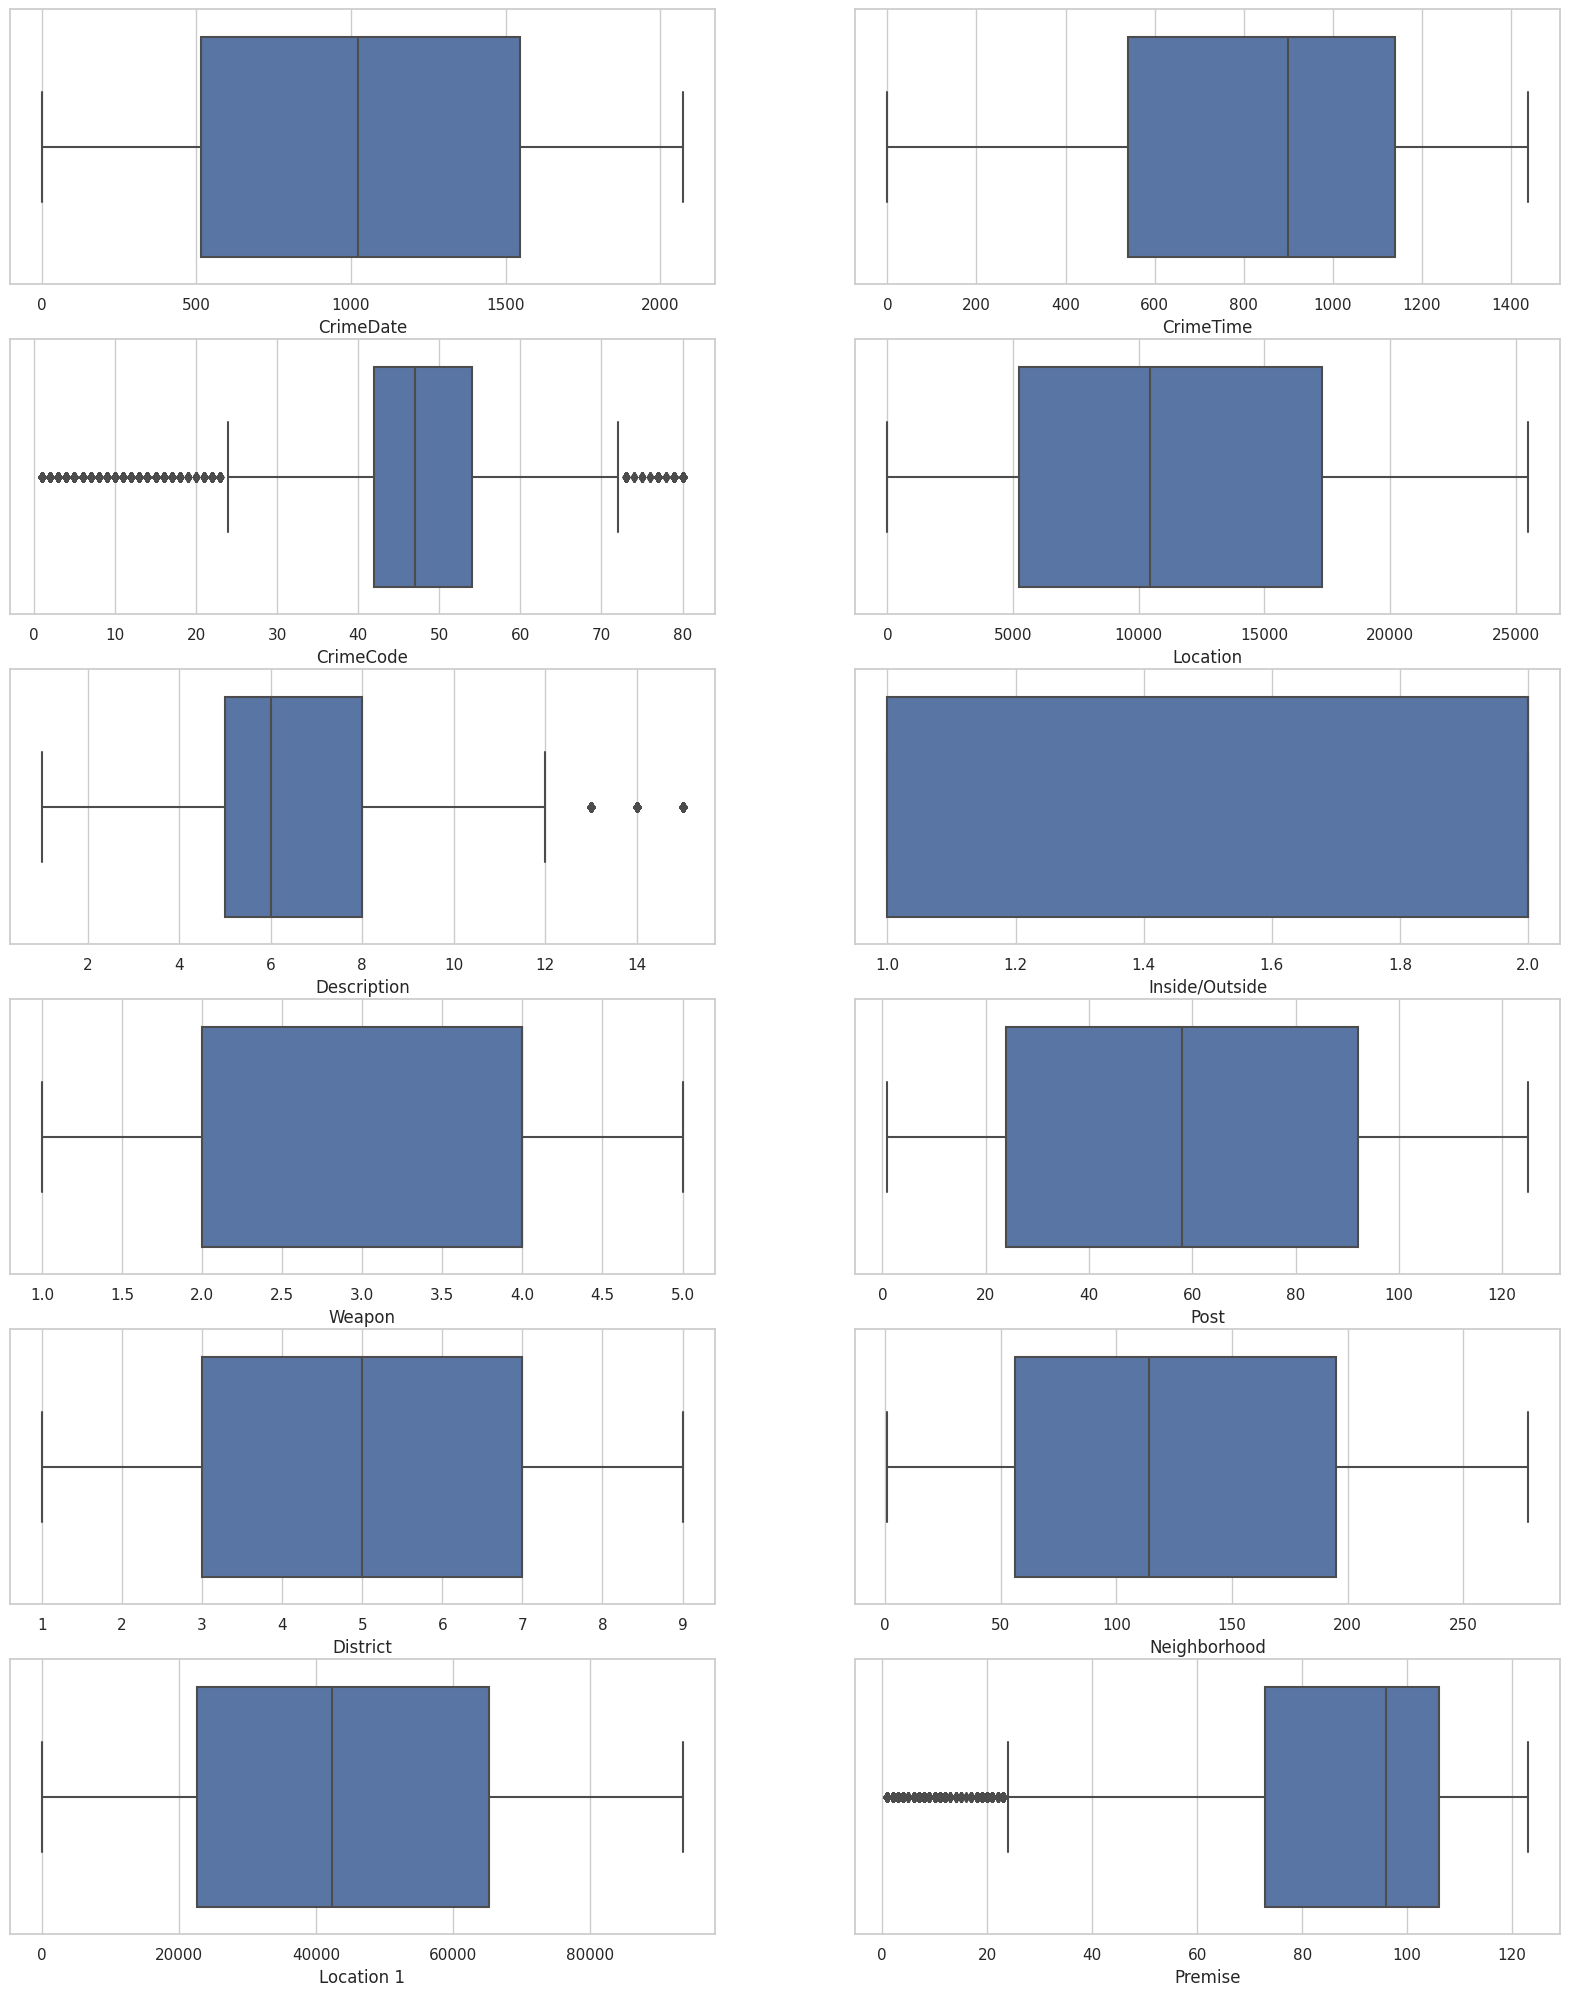

In [ ]:
fig, ax = plt.subplots(6 , 2 , figsize=(20, 25))

# flattening the 2D axis into 1D

ax = ax.ravel()

sns.set_theme(style="whitegrid")
for axid, col in enumerate(feature_list):
    sns.boxplot(x=cleaned_df[col], ax=ax[axid])

we can see there are certain out liers in crime code , premise and description.

## Inter Quartile Range

In [ ]:
quantile_remove_list = ['Premise' , 'Description' , 'CrimeCode']

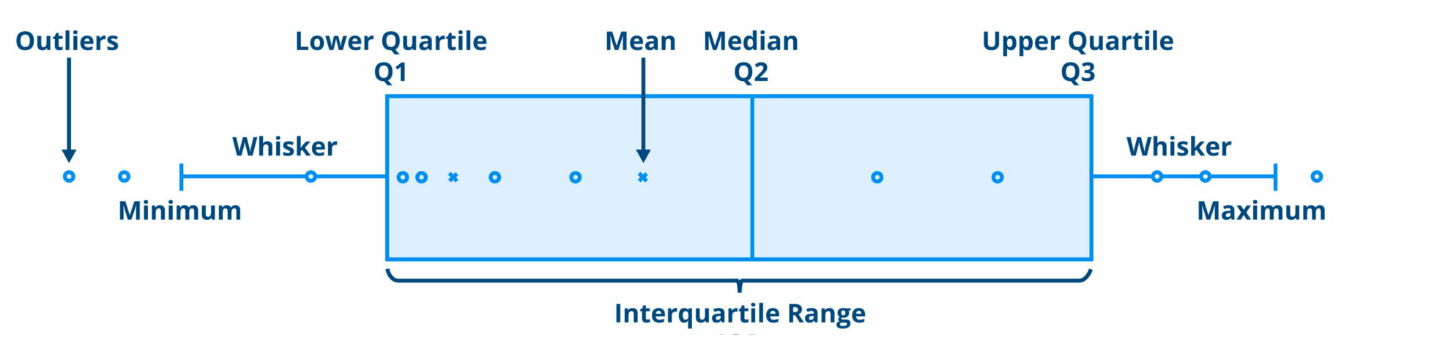

In [ ]:
for ind , col in enumerate(quantile_remove_list):
  Q1 = np.percentile(cleaned_df[col], 25, method='midpoint')
  Q3 = np.percentile(cleaned_df[col], 75, method='midpoint')
  IRQ = Q3 - Q1
  # upper range is always Q3 + 1.5*IRQ
  # lower range is always Q1 - 1.5*IRQ
  upper_range = Q3 + 1.5*IRQ
  lower_range = Q1 - 1.5*IRQ
  cleaned_df = cleaned_df[cleaned_df[col] >= lower_range]
  cleaned_df = cleaned_df[cleaned_df[col] <= upper_range]

In [ ]:
cleaned_df.shape

(215392, 12)

In [ ]:
cleaned_df.to_csv("preprocessed.csv")

we are finally left with 215392 instances and 12 columns.

# 5. Modeling

### What is regression?

Regression is a statistical technique used in data analysis and machine learning to model the relationship between a dependent variable (also called the target or outcome variable) and one or more independent variables (also called predictors or features).

There are several assumptions and constraints on both dependent(target) and independent(predector) features that should be considered to ensure the validity and reliability of the regression model.
Violating these constraints can lead to inaccurate or unreliable results.

 One of the most fundamental assumptions is that there is a **linear relationship between independent and dependent features**. If the relationship is not linear, the regression model may not perform well on the given data.


* We can find the correlation between the independent and dependent features to find that if both of them and linearly correlated or not.
* Correlation given value between -1 to 1. -1 suggests that there is negative corelation between given features, 1 suggests that there is a positive corelation between the given features and 0 means there is no linear correlation between given features.

In [ ]:
cleaned_df[cleaned_df.columns[1:]].corr()['CrimeTime'][:]

Location          0.007184
Description       0.039771
Inside/Outside    0.096543
Weapon            0.026694
Post              0.002460
District          0.000591
Neighborhood      0.012002
Premise           0.016413
Location 1        0.010963
CrimeDate         0.000733
CrimeTime         1.000000
Name: CrimeTime, dtype: float64

We can see that the correlation of 'CrimeTime' with any other feature is nearly 0. this suggests that **CrimeTime is not linearly correlated to any other feature of the dataset**.
Because of this we can deduce that it is **not ideal** to apply regression on this dataset.

#### For the purpose of regression analysis we can still do it by encoding the categorical features.

Based on the following attributes we are going to predict time at which it is not safe to go out in that locality.


*   Crime Description
*   Weapon type
*   Crime category(inside/outside)
*   Crime district

## Model types
1. Linear Regression
2. XGBoost
3. Random Forest Regressor
4. Ridge Regressor
5. Lasso Regressor


In [ ]:
pre_df = pd.read_csv("preprocessed.csv")
pre_df.head()

Unnamed: 0  CrimeCode  Location  Description  Inside/Outside  Weapon  Post  \
0           1         61     22481            4               2       4     9   
1           3         40      5265            1               1       5   121   
2           4         42       932            6               2       2     3   
3           5         44     23781            5               1       4   116   
4           8         40      7536            1               2       5    82   

   District  Neighborhood  Premise  Location 1  CrimeDate  CrimeTime  
0         1           215      106       52656       2072       1380  
1         7            38       96       15312       2072       1370  
2         1            64      106       21549       2072       1351  
3         7            46       96        3482       2072       1320  
4         5           268      106       52781       2072       1260

In [ ]:
# Training attributes
newdata = pre_df[["Description" , "District" , "Inside/Outside" , "Weapon"]]

In [ ]:
# importing required libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newdata, pre_df['CrimeTime'],test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((172313, 4), (43079, 4))

### 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression.coef_

array([-1.58331042e+14, -1.58331042e+14, -1.58331042e+14, -1.58331042e+14,
       -1.58331042e+14, -1.58331042e+14, -1.58331042e+14, -1.58331042e+14,
       -1.58331042e+14,  9.92468630e+14,  9.92468630e+14,  2.76323080e+14,
        2.76323080e+14,  2.76323080e+14,  2.76323080e+14,  2.76323080e+14,
       -1.65800353e+15, -1.65800353e+15, -1.65800353e+15, -1.65800353e+15,
       -1.65800353e+15, -1.65800353e+15, -1.65800353e+15, -1.65800353e+15,
       -1.65800353e+15])

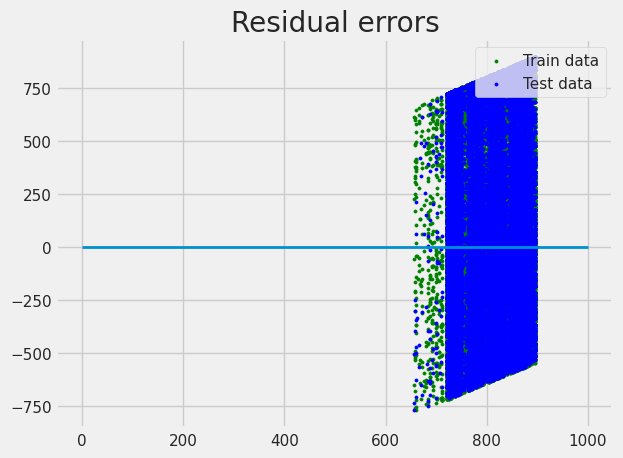

In [ ]:
# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(regression.predict(X_train),
            regression.predict(X_train) - y_train,
            color="green", s=5,
            label='Train data')

# plotting residual errors in test data
plt.scatter(regression.predict(X_test),
            regression.predict(X_test) - y_test,
            color="blue", s=5,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=1000, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

In [ ]:
#Different error measures
y_train_predicted = regression.predict(X_train)
best_param_linear = {}

# Error in training data
train_rmse_linear = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae_linear = mean_absolute_error(list(y_train), y_train_predicted)

print("Training root mean sqaure error is " , train_rmse_linear)
print("Training mean absolute error is " , train_mae_linear)

# Error in testing data
test_rmse_linear = np.sqrt(mean_squared_error(list(y_test), newPred))
test_mae_linear = mean_absolute_error(list(y_test), newPred)

print("Test root mean sqaure error is " , test_rmse_linear)
print("Test mean absolute error is " , test_mae_linear)


Training root mean sqaure error is  394.42540129524394
Training mean absolute error is  326.7415669450361
Test root mean sqaure error is  393.7839521112905
Test mean absolute error is  325.50819424777734


### 2. XGBoost Regression

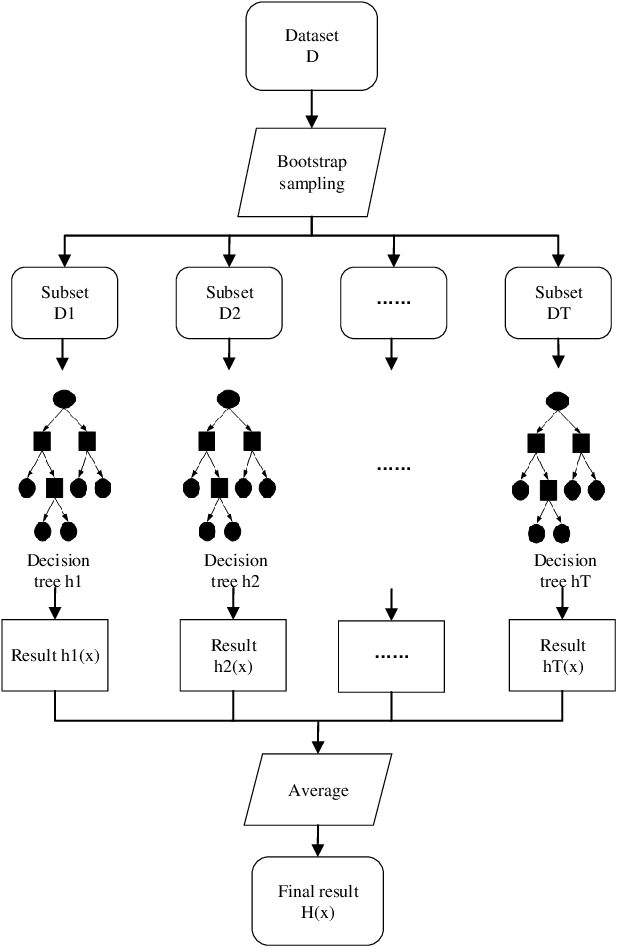

Source: researchgate.net

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr = XGBRegressor()
parameters = {'n_estimators': list(range(510,700,100)), 'learning_rate' : [0.001, 0.01]}

XGB_regressor = GridSearchCV(xgbr, parameters, n_jobs=20, verbose=0)
XGB_regressor.fit(X_train_scaled, list(y_train))

best_model = XGB_regressor.best_estimator_

# Error in training data
y_train_predicted = best_model.predict(X_train_scaled)
train_rmse_XGB = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae_XGB = mean_absolute_error(list(y_train), y_train_predicted)

# best parameters
best_param_XGB = XGB_regressor.best_params_

print("Training root mean sqaure error is " , train_rmse_XGB )
print("Training mean absolute error is " , train_mae_XGB )
print("Best parameters are " , best_param_XGB)

# Error in testing data
y_predicted = best_model.predict(X_test_scaled)
test_rmse_XGB = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae_XGB = mean_absolute_error(list(y_test), y_predicted)

print("Test root mean sqaure error is " , test_rmse_XGB )
print("Test mean absolute error is " , test_mae_XGB )

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Training root mean sqaure error is  393.7042393636855
Training mean absolute error is  326.10430481538293
Best parameters are  {'learning_rate': 0.01, 'n_estimators': 610}
Test root mean sqaure error is  393.32535315814323
Test mean absolute error is  325.0872110929874


### 3. Random Forest Regressor

* We are going to use RandomForest regression as regression technique.
* Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.


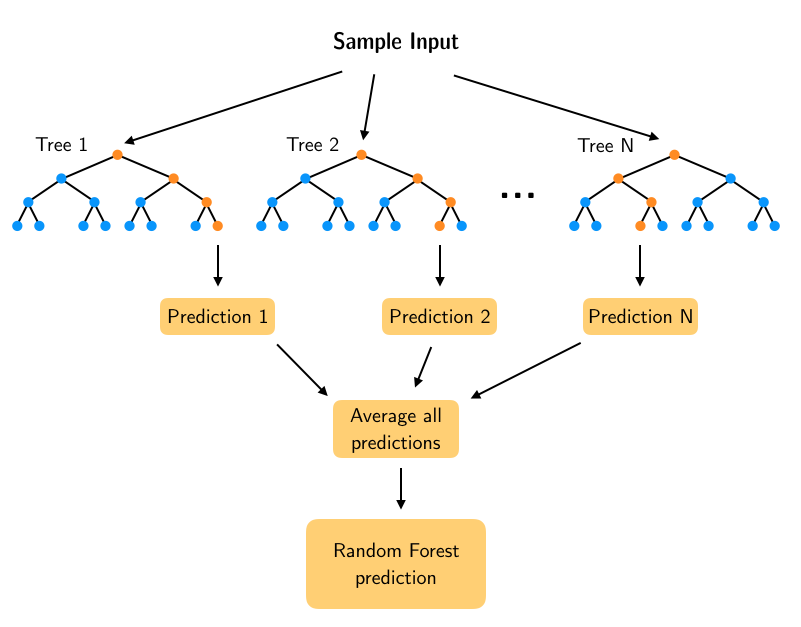

Source: mdpi.com

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(random_state = 42)
parameters = {'n_estimators': list(range(5, 25, 5)), 'max_depth': list(range(1, 10, 2)), 'max_features': ['sqrt', 'log2', 'auto']}

randomForest_regressor = GridSearchCV(randomForest, parameters, n_jobs=20, verbose=0)
randomForest_regressor.fit(X_train_scaled, list(y_train))

best_model = randomForest_regressor.best_estimator_

# Error in training data
y_train_predicted = best_model.predict(X_train_scaled)
train_rmse_RF = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae_RF = mean_absolute_error(list(y_train), y_train_predicted)

# best parameters
best_param_RF = randomForest_regressor.best_params_

print("Training root mean sqaure error is " , train_rmse_RF)
print("Training mean absolute error is " , train_mae_RF)
print("Best parameters are " , best_param_RF)

# Error in testing data
y_predicted = best_model.predict(X_test_scaled)
test_rmse_RF = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae_RF = mean_absolute_error(list(y_test), y_predicted)

print("Test root mean sqaure error is " , test_rmse_RF)
print("Test mean absolute error is " , test_mae_RF)

Training root mean sqaure error is  393.83140600394916
Training mean absolute error is  326.04072297572014
Best parameters are  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 20}
Test root mean sqaure error is  393.3352964890662
Test mean absolute error is  324.96194026086675


### 4. Ridge Regressor

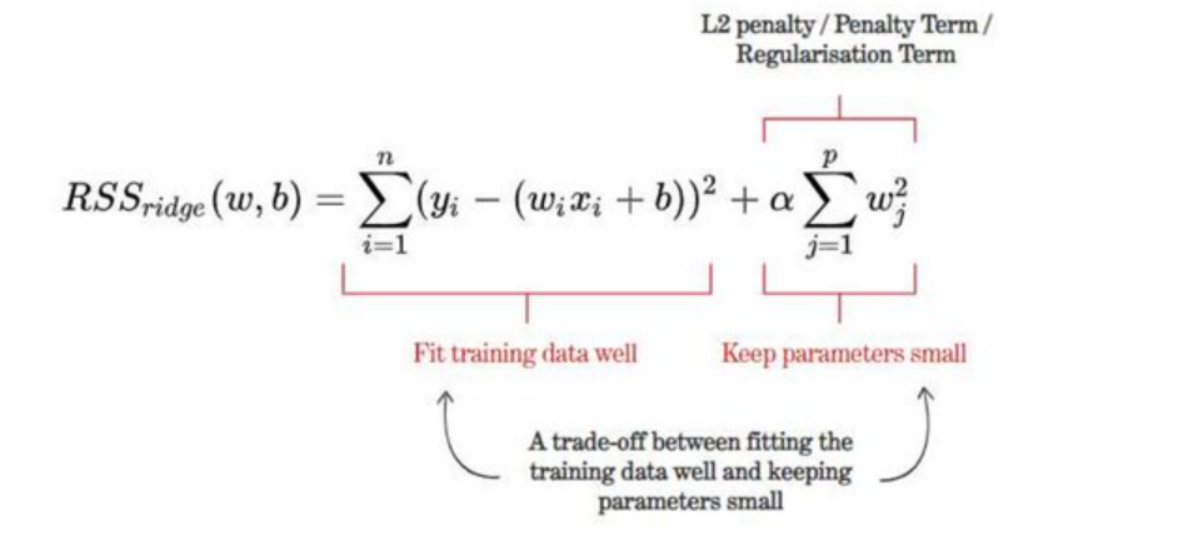
source : vitalflux.com


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge=Ridge()
parameters={'alpha':[0 , 0.5 , 1 , 2 , 3]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train_scaled, list(y_train))

best_model = ridge_regressor.best_estimator_

# Error in training data
y_train_predicted = best_model.predict(X_train_scaled)
train_rmse_ridge = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae_ridge = mean_absolute_error(list(y_train), y_train_predicted)

# Best parameters
best_params_ridge = ridge_regressor.best_params_

print("Training root mean sqaure error is " , train_rmse_ridge )
print("Training mean absolute error is " , train_mae_ridge )
print("Best parameters are " , best_params_ridge)

# Error in testing data
y_predicted = best_model.predict(X_test_scaled)
test_rmse_ridge = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae_ridge = mean_absolute_error(list(y_test), y_predicted)

print("Test root mean sqaure error is " , test_rmse_ridge )
print("Test mean absolute error is " , test_mae_ridge )

Training root mean sqaure error is  394.41698652203974
Training mean absolute error is  326.79233537038465
Best parameters are  {'alpha': 3}
Test root mean sqaure error is  393.77819892462657
Test mean absolute error is  325.5791178356594


### 5. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
parameters = { 'alpha' : [0.001, 0.01, 0.1, 1, 2, 3]}
lassoRegressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)
lassoRegressor.fit(X_train, y_train)

bestModel =  lassoRegressor.best_estimator_

# Error in Training Data
y_train_predicted = bestModel.predict(X_train_scaled)
train_rmse_lasso = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae_lasso = mean_absolute_error(list(y_train), y_train_predicted)

# Best Parameters
best_params_lasso = lassoRegressor.best_params_

print("Training Root Mean Squared Error:  ", train_rmse_lasso)
print("Training Mean Absolute Error: ", train_mae_lasso)
print("Best Parameters: ", best_params_lasso)

# Error in testing data
y_predicted = bestModel.predict(X_test_scaled)
test_rmse_lasso = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae_lasso = mean_absolute_error(list(y_test), y_predicted)

print("Testing Root Mean Squared Error: ", test_rmse_lasso)
print("Testing Mean Absolute Error: ", test_mae_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Training Root Mean Squared Error:   430.4632534990017
Training Mean Absolute Error:  370.417923282591
Best Parameters:  {'alpha': 0.001}
Testing Root Mean Squared Error:  428.6931081721136
Testing Mean Absolute Error:  369.07249097704613


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### Results

In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Model_Name'] = ['Linear Regression', 'XGBoost Regressor', 'Random Forest Regressor', 'Ridge Regressor', 'Lasso Regressor']
    model_results['Train_RMSE'] = [train_rmse_linear, train_rmse_XGB, train_rmse_RF, train_rmse_ridge, train_rmse_lasso]
    model_results['Test_RMSE'] = [test_rmse_linear, test_rmse_XGB, test_rmse_RF, test_rmse_ridge, test_rmse_lasso]
    model_results['Train_MAE'] = [train_mae_linear, train_mae_XGB, train_mae_RF, train_mae_ridge, train_mae_lasso]
    model_results['Test_MAE'] = [test_mae_linear, test_mae_XGB, test_mae_RF, test_mae_ridge, test_mae_lasso]
    model_results['best_params'] = [best_param_linear, best_param_XGB, best_param_RF, best_params_ridge, best_params_lasso]

    return model_results

In [ ]:
model_results = eval_models()
model_results

Model_Name  Train_RMSE   Test_RMSE   Train_MAE    Test_MAE  \
0        Linear Regression  394.425401  393.783952  326.741567  325.508194   
1        XGBoost Regressor  393.704239  393.325353  326.104305  325.087211   
2  Random Forest Regressor  393.852753  393.284667  326.137026  324.984338   
3          Ridge Regressor  394.416987  393.778199  326.792335  325.579118   
4          Lasso Regressor  430.463253  428.693108  370.417923  369.072491   

                                         best_params  
0                                                 {}  
1       {'learning_rate': 0.01, 'n_estimators': 610}  
2  {'max_depth': 9, 'max_features': 'sqrt', 'n_es...  
3                                       {'alpha': 3}  
4                                   {'alpha': 0.001}

# 6. Inference

### Why can't we use labelencoding ?

Since every columns of dataframe is categorical, using labelencoder may leads to the generation of priority issues during model training of data sets encoder from 0 to n-1 may give priority to categorties encoded with higher encoded index.

To overcome this issue we will be using onehotencoding in place of label encoding. Increasing number of features might leads to overfitting thats why are using ridge regression which introduces regularisation.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotdf = cleaned_df.copy()
onehotdf.head()

CrimeCode  Location  Description  Inside/Outside  Weapon  Post  District  \
1         61     22481            4               2       4     9         1   
3         40      5265            1               1       5   121         7   
4         42       932            6               2       2     3         1   
5         44     23781            5               1       4   116         7   
8         40      7536            1               2       5    82         5   

   Neighborhood  Premise  Location 1  CrimeDate  CrimeTime  
1           215      106       52656       2072       1380  
3            38       96       15312       2072       1370  
4            64      106       21549       2072       1351  
5            46       96        3482       2072       1320  
8           268      106       52781       2072       1260

In [ ]:
encoder = OneHotEncoder()

newframe = pd.DataFrame(encoder.fit_transform(onehotdf[['Description', 'Inside/Outside' , 'Weapon' , 'District']]).toarray())

In [ ]:
newframe.head()

0    1    2    3    4    5    6    7    8    9   ...   15   16   17   18  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  0.0  

[5 rows x 25 columns]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(newframe, onehotdf["CrimeTime"], random_state=42, test_size=0.20)

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((172313, 25), (43079, 25))

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0 , 0.5 , 1 , 2 , 3]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train_scaled, list(y_train))

best_model = ridge_regressor.best_estimator_

y_train_predicted = best_model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae = mean_absolute_error(list(y_train), y_train_predicted)

print("Training root mean sqaure error is " , train_rmse )
print("Training mean absolute error is " , train_mae )
print("Best parameters are " , ridge_regressor.best_params_)

y_predicted = best_model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae = mean_absolute_error(list(y_test), y_predicted)

print("Test root mean sqaure error is " , test_rmse )
print("Test mean absolute error is " , test_mae )

Training root mean sqaure error is  394.41698652203974
Training mean absolute error is  326.79233537038465
Best parameters are  {'alpha': 3}
Test root mean sqaure error is  393.77819892462657
Test mean absolute error is  325.5791178356594


### Conclusion

As we saw above that it was not as ideal situation to apply regression and it is clearly indicated from analysing errors. High training and testing errors indicate that model actually underfit the dataset but since training and testing errors are in same range our model did not overfit the dataset rather is generalised well.  